# Lab 3 - Univariate Non-linear Discrete-time Deterministic (UNDD) models

Authors: Irena Papst and Elizabeth O'Meara

## Analysis of the Logistic Growth Model

In lecture, your professor introduced the logistic growth model as an example of a Univariate Non-linear Discrete-time Deterministic model. It is described by the following difference equation:

$$
\Delta P = R_{max}P \left (1-\frac{P}{P_{max}} \right )
$$

Since $\Delta P = P_{N+1}-P_{N}$, the fixed points of this model occur when $\Delta P=0$. In class, you discovered that the fixed points of this model are $P^*=0$ and $P^*=P_{max}$. To determine the stability of the fixed points, we can use the following theorem derived in lecture 7.

**Theorem:** Given the equation $P_{N+1}=f(P_{N})$ where $P^*$ is the fixed point, if $|f'(P^*)| < 1$, then the fixed point is stable. If $|f'(P^*)| > 1$, then the fixed point is unstable. If $|f'(P^*)| = 1$, we cannot determine the stability.

In order to use this theorem, we must transform our model back to the form, $P_{N+1}=f(P_{N})$. Let $\Delta P = P_{N+1}-P_{N}$ and $P=P_N$, then we get the following equation.

$$
P_{N+1} = R_{max}P_N \left (1-\frac{P_N}{P_{max}} \right )+P_N
$$

**Exercise 1**: Using the theorem derived in class, determine the ranges of parameters for which $P^*=0$ and $P^*=P_{max}$ are stable. Similarily for unstable.

**Exercise 2**: Define a function that simulates the logistic growth model. Your functions should take the arguements $P_0$, $P_{max}$, $R_{max}$, and a total number of time steps $T$ (not counting $N = 0$). Make sure the output of your function is a vector containing $P_N$ for each simulated time $N$.

Confidence check: with $R_{max}=0.5$, $P_{max}=100$, $P_0=50$, you should get: $P_{10}=99.821730$.

## Aggregating multiple simulation results for plotting

It is easy to show several simulations in the same plot using `seaborn` if we first create a table that contains data from all of the simulations, provided there is a column that identifies each simulation. For these examples, we will use the function we wrote in Lab 2 to simulate solutions to the geometric growth model.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def geom_growth(m=10, r=0.5, P0=1000, T=10):
    tvec = np.arange(T + 1)
    P = np.zeros(T + 1)
    P[0] = P0
    
    for t in tvec[:T]:
        P[t + 1] = r*P[t] + m
    
    return(tvec, P)

First we create a dataframe using the `pandas` function `DataFrame()`, that has the columns `time` and `P`. I have also added a column for the value of `r`, as a way to identify each simulation, since that's what we will vary between them. 

In [3]:
r=0.5
tvec, P = geom_growth(r=r)

df1 = pd.DataFrame({
    'time': tvec,
    'P': P,
    'r': np.repeat(r, len(P))
})

print(df1)

    time            P    r
0      0  1000.000000  0.5
1      1   510.000000  0.5
2      2   265.000000  0.5
3      3   142.500000  0.5
4      4    81.250000  0.5
5      5    50.625000  0.5
6      6    35.312500  0.5
7      7    27.656250  0.5
8      8    23.828125  0.5
9      9    21.914062  0.5
10    10    20.957031  0.5


Now I simulate another trajectory, instead with $r=0.8$, and create a dataframe.

In [7]:
r=0.8
tvec, P=geom_growth(r=r)

df2 = pd.DataFrame({
    'time': tvec,
    'P': P,
    'r': np.repeat(r, len(P))
})

print(df2)

    time            P    r
0      0  1000.000000  0.8
1      1   810.000000  0.8
2      2   658.000000  0.8
3      3   536.400000  0.8
4      4   439.120000  0.8
5      5   361.296000  0.8
6      6   299.036800  0.8
7      7   249.229440  0.8
8      8   209.383552  0.8
9      9   177.506842  0.8
10    10   152.005473  0.8


Now, we can stack these two dataframes so that we have a single dataframe with all of the data we wish to plot. To accomplish this, use the `pandas` function `concat()`. In the function, the dataframes we wish to combine are enclosed in square brackets and separated by a comma. We then tell the function to stack them vertically (row-wise) by setting `axis`$=0$ (that's the row axis of the table). I also include the argument `ignore_index=True` so that the old row indices are not carried over into the new dataframe, but instead the new, longer , table is reindexed in a logical way.

In [8]:
df = pd.concat([df1, df2], axis=0, ignore_index=True)
print(df)

    time            P    r
0      0  1000.000000  0.5
1      1   510.000000  0.5
2      2   265.000000  0.5
3      3   142.500000  0.5
4      4    81.250000  0.5
5      5    50.625000  0.5
6      6    35.312500  0.5
7      7    27.656250  0.5
8      8    23.828125  0.5
9      9    21.914062  0.5
10    10    20.957031  0.5
11     0  1000.000000  0.8
12     1   810.000000  0.8
13     2   658.000000  0.8
14     3   536.400000  0.8
15     4   439.120000  0.8
16     5   361.296000  0.8
17     6   299.036800  0.8
18     7   249.229440  0.8
19     8   209.383552  0.8
20     9   177.506842  0.8
21    10   152.005473  0.8


Now within `sns.lineplot()`, we set `x='time'` and `y='P'`, but now we can plot each simulation with a different colour easily using the `hue` arguement. We can either use the default colours, or we can choose our own colours using the `palette` function (see example). 

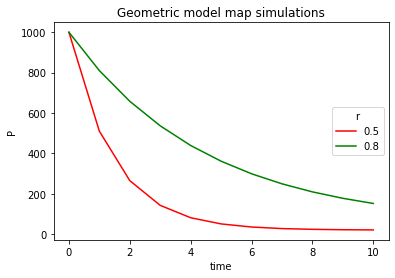

In [9]:
sns.lineplot(data=df, x='time', y='P', hue='r', palette=['r', 'g'])
plt.legend(loc='center right', title='r')
plt.title('Geometric model map simulations');

**Exercise 3**: Update your logistic growth funciton to output a dataframe containing the following 3 columns: $P$, $time$ and $R_{max}$.

**Exercise 4**: Using your finalized function, using $P_{max}=100$, $P_0=50$, $T=10$, run a simulation for the following 4 scenarios (where changing $R_{max}$ will reach the desired outcome):

1. $P^*=0$ is stable
2. $P^*=0$ is unstable
1. $P^*=P_{max}$ is stable
2. $P^*=P_{max}$ is unstable

Then, using `seaborn` as described, plot each of these simulations on the same plotting window, with a legend describing the value of $R_{max}$.

-----

# Homework 3

Homework 3 is due on **Wedneday 9 February at 9 PM**. Please solve each problem either on paper or in this notebook (whichever is more appropriate, unless otherwise indicated). Be sure all solution code is **fully executed** before screenshotting your solution to submit to Crowdmark. Make sure to save copies of all of your work (Jupyter notebook, handwritten solutions), in case a grader wants to verify your work.

-----

## Ricker map

The **Ricker map** is a UNDD model defined as

$$P_{N+1} = a P_N e^{-b P_N}$$ 

Assume $a>0$, $b>0$, $P \geq 0$.

-----

**Problem 1:** _(6 pts)_ Find all the equilibria of the Ricker map. Show all of your work. (You may handwrite your solution instead of using $\LaTeX$, but you are encouraged to try to practice $\LaTeX$ typsetting if you like).

-----

**Problem 2:** _(4 pts)_ Find an inquality relating the model parameters $a$ and $b$ which ensures all model equilibria are biologically relevant (_i.e._ all model equilibria are in the domain $P \geq 0$). Simplify this inquality as much as possible.

-----

**Problem 3:** _(6 pts)_ Derive the stability of all fixed points when they are biologically relevant. 

-----

**Problem 4:** _(4 pts)_ Show that if $a<1$, $P$ will decrease monotonically toward zero (regardless of the value of $b$), _i.e._ that $P_{N+1} < P_N$ for any possible $P_N > 0$. (Remember from above that we are assuming $a>0$, $b>0$.)

-----

**Problem 5:** _(4 pts)_ Interpret the Ricker model term $ae^{-b P}$. What are are the underlying assumptions on system behaviour that yields this term? 

_Hint:_ Look at the derivation of the logistic growth model from lecture and how we interpreted the $R_{\rm max}(1-P/P_{\rm max})$ term there.